In [ ]:
getwd()

setwd('/content')
dir()

[1] "/content"

[1] "Medicaldataset_Mod_2.csv" "sample_data"

In [ ]:
Medical = read.csv('Medicaldataset_Mod_2.csv', header = T, stringsAsFactors = F)
#head
View(Medical)


Age,Gender,Heart.rate,Systolic.blood.pressure,Diastolic.blood.pressure,Blood.sugar,CK.MB,Troponin,Result
<int>,<chr>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<chr>
64,Male,66,160,83,160,1.800,0.012,negative
21,Male,94,98,46,296,6.750,1.060,positive
55,Male,64,160,77,270,1.990,0.003,negative
64,Male,70,120,55,270,13.870,0.122,positive
55,Male,64,112,65,300,1.080,0.003,negative
58,Female,61,112,58,87,1.830,0.004,negative
32,Female,40,179,68,102,0.710,0.003,negative
63,Male,60,214,82,87,300.000,2.370,positive
44,Female,60,154,81,135,2.350,0.004,negative


### Convertir la escala lineal a log
Se puede hacer en la misma variable o en este caso crear una nueva variable donde se gurada la CK-MB pero en escala logarítmica

A partir de este punto solo usé el campo CK.MB_log

In [ ]:

Medical$CK.MB_log <- log1p(Medical$CK.MB)


head(Medical)

,Age,Gender,Heart.rate,Systolic.blood.pressure,Diastolic.blood.pressure,Blood.sugar,CK.MB,Troponin,Result,CK.MB_log
,<int>,<chr>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>
1,64,Male,66,160,83,160,1.80,0.012,negative,1.0296194
2,21,Male,94,98,46,296,6.75,1.060,positive,2.0476928
3,55,Male,64,160,77,270,1.99,0.003,negative,1.0952734
4,64,Male,70,120,55,270,13.87,0.122,positive,2.6993458
5,55,Male,64,112,65,300,1.08,0.003,negative,0.7323679
6,58,Female,61,112,58,87,1.83,0.004,negative,1.0402767


In [ ]:
library(ggplot2)

In [ ]:
library(dplyr, warn.conflicts=FALSE)
grouped <- group_by(tbl_df(Medical),Result)
summarize(grouped, count = length(Result), mean = mean(CK.MB_log), median = median(CK.MB_log), stdev = sd(CK.MB_log))

Warning message:
“`tbl_df()` was deprecated in dplyr 1.0.0.
ℹ Please use `tibble::as_tibble()` instead.”


Result,count,mean,median,stdev
<chr>,<int>,<dbl>,<dbl>,<dbl>
negative,509,1.196388,1.196948,0.381226
positive,810,1.997129,1.563393,1.291996


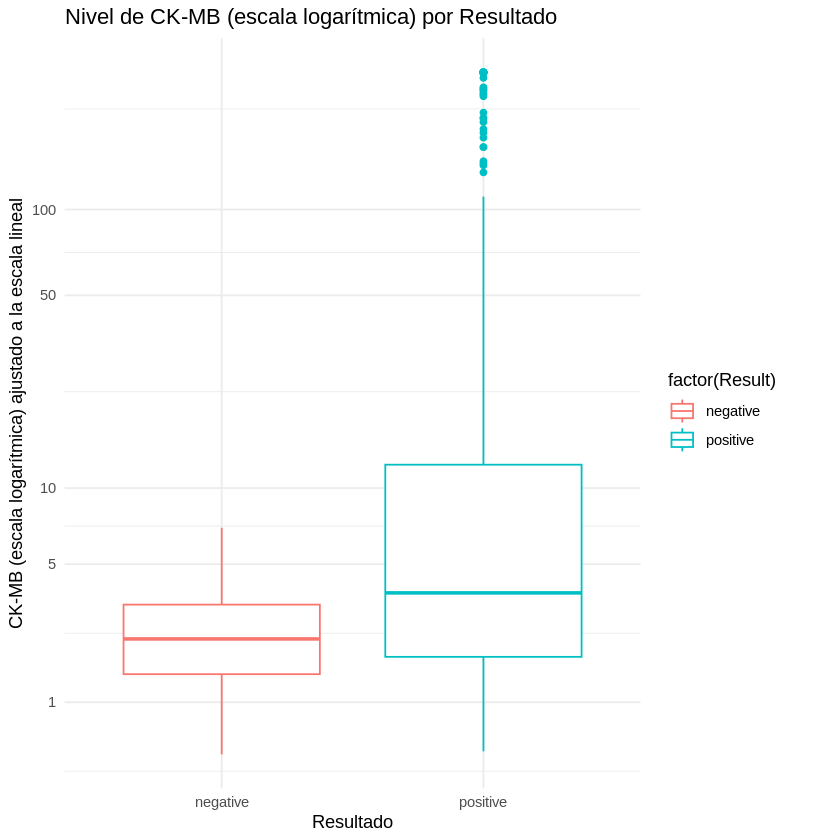

In [ ]:

original_ticks_ckmb <- c(1, 5, 10, 50, 100, 500)

log_ticks_ckmb <- log1p(original_ticks_ckmb)

ggplot(Medical, aes(x=factor(Result), y=CK.MB_log, color=factor(Result))) +
  geom_boxplot() +
  labs(title="Nivel de CK-MB (escala logarítmica) por Resultado",
       y = "CK-MB (escala logarítmica) ajustado a la escala lineal",
       x = "Resultado") +
  scale_y_continuous(breaks = log_ticks_ckmb,
                     labels = original_ticks_ckmb) +
  theme_minimal()

In [ ]:
Medical_ttest <- t.test(CK.MB_log ~ Result, data = Medical)
Medical_ttest


	Welch Two Sample t-test

data:  CK.MB_log by Result
t = -16.531, df = 1017.6, p-value < 2.2e-16
alternative hypothesis: true difference in means between group negative and group positive is not equal to 0
95 percent confidence interval:
 -0.8957931 -0.7056896
sample estimates:
mean in group negative mean in group positive 
              1.196388               1.997129 


install.packages("DataExplorer")
library(DataExplorer)

In [ ]:
#detect outlyers_CK.MB
# 1. Get the outlier values
boxplot_stats <- boxplot.stats(Medical$CK.MB_log)
outlier_values <- boxplot_stats$out

# 2. Find the row numbers where these outlier values appear in the original column
#    We use `which()` to get the indices (row numbers) where the values match any of the outliers.
outlier_rows <- which(Medical$CK.MB_log %in% outlier_values)

# 3. Combine the row numbers and outlier values into a data frame for a clear list
outlier_info <- data.frame(
  Row_ID = outlier_rows,
  Outlier_Value = Medical$CK.MB_log[outlier_rows] # Get the actual outlier value for that row
)

# Print the list of outlier IDs and their values
print(outlier_info)

    Row_ID Outlier_Value
1        8      5.707110
2       22      4.562158
3       24      3.940805
4       25      3.681855
5       29      5.707110
6       58      3.617383
7       81      3.495598
8       83      5.707110
9       98      5.707110
10     102      5.112590
11     104      5.707110
12     114      3.737431
13     115      4.575535
14     116      3.968403
15     117      4.323470
16     123      3.927896
17     130      3.598681
18     145      5.581238
19     161      3.702042
20     186      5.707110
21     188      5.662613
22     222      4.599957
23     237      4.633758
24     240      4.910447
25     270      3.802878
26     278      4.610755
27     308      4.187531
28     321      3.471966
29     326      4.567884
30     329      4.656813
31     360      3.565581
32     388      4.574917
33     394      5.707110
34     412      3.687378
35     428      5.226284
36     430      5.339939
37     436      5.111988
38     446      5.588372
39     452      5.707110
